In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Import data
df = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/listings.csv')

**Dataframe Information**

In [4]:
df.count()

id                                3734
name                              3734
host_id                           3734
host_name                         3734
neighbourhood                     3734
latitude                          3734
longitude                         3734
room_type                         3734
price                             3734
minimum_nights                    3734
number_of_reviews                 3734
reviews_per_month                 3365
calculated_host_listings_count    3734
availability_365                  3734
number_of_reviews_ltm             3734
review_scores_value               3362
review_scores_location            3362
review_scores_communication       3362
review_scores_checkin             3362
review_scores_cleanliness         3362
review_scores_accuracy            3362
review_scores_rating              3365
maximum_nights                    3734
beds                              3680
bedrooms                          3288
bathrooms                

In [4]:
# Check if there are any null values
df.isnull().sum(axis = 0)

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 369
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
review_scores_value               372
review_scores_location            372
review_scores_communication       372
review_scores_checkin             372
review_scores_cleanliness         372
review_scores_accuracy            372
review_scores_rating              369
maximum_nights                      0
beds                               54
bedrooms                          446
bathrooms                           9
accommodates

In [5]:
# Check if there are any null values
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       1
4       0
       ..
3729    9
3730    8
3731    8
3732    8
3733    8
Length: 3734, dtype: int64

**Convert Dataframe to Geodataframe**

In [6]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')

### Correlation Matrix

In [7]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.567294
accommodates                      0.561563
beds                              0.514923
calculated_host_listings_count    0.243406
id                                0.065775
maximum_nights                    0.057474
availability_365                  0.022898
review_scores_location            0.020752
review_scores_cleanliness         0.019260
latitude                          0.016137
review_scores_accuracy            0.001554
review_scores_rating              0.000882
host_id                          -0.000534
review_scores_communication      -0.003661
review_scores_checkin            -0.016518
minimum_nights                   -0.032539
review_scores_value              -0.038478
longitude                        -0.067791
reviews_per_month                -0.117777
number_of_reviews_ltm            -0.127049
number_of_reviews                -0.129120
Name: price, dtype: float64

In [8]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

In [9]:
null_index = gdf_utm[feature_list].isnull().sum(axis=1)

In [10]:
null_index == 0


0        True
1        True
2        True
3       False
4        True
        ...  
3729    False
3730    False
3731    False
3732    False
3733    False
Length: 3734, dtype: bool

### Get rid of Rows with Null/"NaN" values

In [11]:
gdf_utm_nonnull = gdf_utm.loc[null_index == 0, :]

In [12]:
gdf_utm_nonnull

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,maximum_nights,beds,bedrooms,bathrooms,accommodates,geometry
0,12899,"Alberta Arts 2 bedroom suite, charming 1906 house",49682,Ali And David,Concordia,45.564880,-122.634180,Entire home/apt,89,3,...,4.99,4.98,4.94,4.93,730,2.0,2.0,1,3,POINT (528547.500 5045769.599)
1,37676,Mt. Hood View in the Pearl District,162158,Paul,Pearl,45.525640,-122.682730,Entire home/apt,140,30,...,4.83,4.86,4.86,4.88,730,1.0,1.0,1,3,POINT (524776.035 5041393.989)
2,41601,Grandpa's Bunkhouse-Backyard Studio,179045,Jean,Roseway,45.548040,-122.585410,Entire home/apt,129,3,...,4.95,4.90,4.90,4.84,29,1.0,1.0,1,2,POINT (532363.029 5043917.214)
4,61893,Perfect Portland Place,300391,Matt,Goose Hollow,45.522580,-122.699550,Entire home/apt,104,30,...,4.93,5.00,5.00,5.00,300,1.0,1.0,1,2,POINT (523463.811 5041048.978)
5,65466,Mt. Tabor Bungalow,170035,Scott,Mt. Tabor,45.505440,-122.610410,Private room,60,2,...,4.97,4.95,4.95,4.92,14,1.0,1.0,1,2,POINT (530434.485 5039174.682)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,53623129,"Modern, Upgraded Apartment - fast wifi and par...",409693567,Patrick,Pearl,45.529118,-122.680400,Entire home/apt,233,1,...,2.00,5.00,5.00,4.00,365,2.0,1.0,1,3,POINT (524956.481 5041781.064)
3690,53631855,Charming guest suite in Maywood Park,6921798,Meredith,Maywood Park,45.553293,-122.561127,Entire home/apt,64,1,...,5.00,5.00,5.00,5.00,365,1.0,1.0,1,4,POINT (534255.407 5044510.893)
3691,53644475,"Fantastic Forested Retreat, Open Layout, Multi...",62261998,ITrip Vacations,Southwest Hills,45.494583,-122.707945,Entire home/apt,137,3,...,5.00,5.00,5.00,5.00,29,1.0,1.0,1,2,POINT (522819.470 5037936.167)
3692,53649962,New Modern 3 BR Designer Home in Trendy N Will...,35305959,Byron (Hüga Homes),Humboldt,45.555253,-122.666736,Entire home/apt,203,2,...,5.00,5.00,5.00,5.00,1125,3.0,3.0,2.5,7,POINT (526011.408 5044688.981)


**Match Neighborhoods to Districts**

In [13]:
neigh_from = ['Arbor Lodge', 'Boise', 'Bridgeton', 'Cathedral Park', 'East Columbia', 'Eliot', 'Hayden Island', 'Humboldt', 'Kenton', 'Overlook', 'Piedmont', 'Portsmouth', 'St. Johns', 'University Park', 'Alameda', 'Alberta Arts District', 'Beaumont-Wilshire', 'North Tabor', 'Concordia', 'Cully', 'Grant Park', 'Hollywood', 'Irvington', 'King', 'Madison South', 'Rose City Park', 'Roseway', 'Sabin', "Sullivan's Gulch", 'Sumner', 'Sunderland', 'Vernon', 'Woodlawn', 'Arnold Creek', 'Ashcreek', 'Bridlemile', 'Collins View', 'Crestwood', 'Far Southwest', 'Hayhurst', 'Hillsdale', 'Homestead', 'Maplewood', 'Markham', 'Marshall Park', 'Multnomah', 'South Burlingame', 'Southwest Hills', 'West Portland Park', 'Argay', 'Centennial', 'Glenfair', 'Hazelwood', 'Lents', 'Mill Park', 'Parkrose', 'Parkrose Heights', 'Pleasant Valley', 'Powellhurst Gilbert', 'Russell', 'Wilkes', 'Arlington Heights', 'Forest Park', 'Goose Hollow ', 'Hillside', 'Linnton', 'Northwest Heights', 'Sylvan Highlands', 'Old Town/Chinatown', 'Portland Downtown', 'Lloyd District', 'Pearl', 'Brentwood–Darlington', 'Brooklyn Action Corps', 'Buckman', 'Creston–Kenilworth', 'Eastmoreland', 'Foster-Powell', 'Hawthorne', 'Hosford-Abernethy', 'Ardenwald-Johnson Creek', 'Kerns', 'Laurelhurst', 'Montavilla', 'Mt. Scott-Arleta', 'Mt. Tabor', 'Reed', 'Richmond', 'Sellwood-Moreland Improvement League', 'South Tabor', 'Sunnyside', 'Woodstock']
neigh_to = ['North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North','North','North','Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'Northwest','Northwest','Northwest','Northwest','Northwest','Northwest','Northwest','Central','Central','Central','Central','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast']
neigh_match_table = pd.DataFrame({'Neighborhood_D': neigh_from, 'Districts': neigh_to})

In [14]:
len(neigh_from)

92

In [15]:
len(neigh_to)

92

In [16]:
neigh_match_table

,Neighborhood_D,Districts
0,Arbor Lodge,North
1,Boise,North
2,Bridgeton,North
3,Cathedral Park,North
4,East Columbia,North
...,...,...
87,Richmond,Southeast
88,Sellwood-Moreland Improvement League,Southeast
89,South Tabor,Southeast
90,Sunnyside,Southeast


In [17]:
neigh_match_table.columns = neigh_match_table.columns.str.replace('Neighborhood_D', 'neighbourhood')
neigh_match_table

,neighbourhood,Districts
0,Arbor Lodge,North
1,Boise,North
2,Bridgeton,North
3,Cathedral Park,North
4,East Columbia,North
...,...,...
87,Richmond,Southeast
88,Sellwood-Moreland Improvement League,Southeast
89,South Tabor,Southeast
90,Sunnyside,Southeast


**Joining Tables together**

In [18]:
join_df = gdf_utm_nonnull.merge(neigh_match_table, how = 'left' , on = 'neighbourhood')
join_df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,maximum_nights,beds,bedrooms,bathrooms,accommodates,geometry,Districts
0,12899,"Alberta Arts 2 bedroom suite, charming 1906 house",49682,Ali And David,Concordia,45.564880,-122.634180,Entire home/apt,89,3,...,4.98,4.94,4.93,730,2.0,2.0,1,3,POINT (528547.500 5045769.599),Northeast
1,37676,Mt. Hood View in the Pearl District,162158,Paul,Pearl,45.525640,-122.682730,Entire home/apt,140,30,...,4.86,4.86,4.88,730,1.0,1.0,1,3,POINT (524776.035 5041393.989),Central
2,41601,Grandpa's Bunkhouse-Backyard Studio,179045,Jean,Roseway,45.548040,-122.585410,Entire home/apt,129,3,...,4.90,4.90,4.84,29,1.0,1.0,1,2,POINT (532363.029 5043917.214),Northeast
3,61893,Perfect Portland Place,300391,Matt,Goose Hollow,45.522580,-122.699550,Entire home/apt,104,30,...,5.00,5.00,5.00,300,1.0,1.0,1,2,POINT (523463.811 5041048.978),NaN
4,65466,Mt. Tabor Bungalow,170035,Scott,Mt. Tabor,45.505440,-122.610410,Private room,60,2,...,4.95,4.95,4.92,14,1.0,1.0,1,2,POINT (530434.485 5039174.682),Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,53623129,"Modern, Upgraded Apartment - fast wifi and par...",409693567,Patrick,Pearl,45.529118,-122.680400,Entire home/apt,233,1,...,5.00,5.00,4.00,365,2.0,1.0,1,3,POINT (524956.481 5041781.064),Central
2925,53631855,Charming guest suite in Maywood Park,6921798,Meredith,Maywood Park,45.553293,-122.561127,Entire home/apt,64,1,...,5.00,5.00,5.00,365,1.0,1.0,1,4,POINT (534255.407 5044510.893),NaN
2926,53644475,"Fantastic Forested Retreat, Open Layout, Multi...",62261998,ITrip Vacations,Southwest Hills,45.494583,-122.707945,Entire home/apt,137,3,...,5.00,5.00,5.00,29,1.0,1.0,1,2,POINT (522819.470 5037936.167),Southwest
2927,53649962,New Modern 3 BR Designer Home in Trendy N Will...,35305959,Byron (Hüga Homes),Humboldt,45.555253,-122.666736,Entire home/apt,203,2,...,5.00,5.00,5.00,1125,3.0,3.0,2.5,7,POINT (526011.408 5044688.981),North


In [19]:
# Check if there are any null values
join_df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       1
4       0
       ..
2924    0
2925    1
2926    0
2927    0
2928    1
Length: 2929, dtype: int64

**Excluding any null values**

In [20]:
join_df.isnull().sum(axis = 0)

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
review_scores_value                 0
review_scores_location              0
review_scores_communication         0
review_scores_checkin               0
review_scores_cleanliness           0
review_scores_accuracy              0
review_scores_rating                0
maximum_nights                      0
beds                                0
bedrooms                            0
bathrooms                           3
accommodates

In [21]:
# Define feature list
new_feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews', 'Districts']

In [22]:
null_join = join_df[new_feature_list].isnull().sum(axis=1)

In [23]:
null_join == 0

0        True
1        True
2        True
3       False
4        True
        ...  
2924     True
2925    False
2926     True
2927     True
2928    False
Length: 2929, dtype: bool

In [25]:
gdf_nonnull_match = join_df.loc[null_join == 0, :]

In [26]:
gdf_nonnull_match

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,maximum_nights,beds,bedrooms,bathrooms,accommodates,geometry,Districts
0,12899,"Alberta Arts 2 bedroom suite, charming 1906 house",49682,Ali And David,Concordia,45.564880,-122.634180,Entire home/apt,89,3,...,4.98,4.94,4.93,730,2.0,2.0,1,3,POINT (528547.500 5045769.599),Northeast
1,37676,Mt. Hood View in the Pearl District,162158,Paul,Pearl,45.525640,-122.682730,Entire home/apt,140,30,...,4.86,4.86,4.88,730,1.0,1.0,1,3,POINT (524776.035 5041393.989),Central
2,41601,Grandpa's Bunkhouse-Backyard Studio,179045,Jean,Roseway,45.548040,-122.585410,Entire home/apt,129,3,...,4.90,4.90,4.84,29,1.0,1.0,1,2,POINT (532363.029 5043917.214),Northeast
4,65466,Mt. Tabor Bungalow,170035,Scott,Mt. Tabor,45.505440,-122.610410,Private room,60,2,...,4.95,4.95,4.92,14,1.0,1.0,1,2,POINT (530434.485 5039174.682),Southeast
5,67036,Historic Home Located in Central City,329777,Will,Sullivan's Gulch,45.531030,-122.644480,Entire home/apt,425,4,...,5.00,5.00,4.93,365,5.0,4.0,2,12,POINT (527760.376 5042005.319),Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,53474842,The Garden Cottage on Broadway ~ 94 WalkScore ~,113868705,Darise,Irvington,45.536460,-122.647340,Entire home/apt,87,1,...,4.50,4.50,3.50,14,1.0,1.0,1,2,POINT (527534.406 5042607.595),Northeast
2923,53574604,Room available in se Portland,433867437,Shamal,Centennial,45.514220,-122.487852,Private room,39,1,...,3.33,4.33,4.00,5,1.0,1.0,1,2,POINT (540002.426 5040203.859),Southwest
2924,53623129,"Modern, Upgraded Apartment - fast wifi and par...",409693567,Patrick,Pearl,45.529118,-122.680400,Entire home/apt,233,1,...,5.00,5.00,4.00,365,2.0,1.0,1,3,POINT (524956.481 5041781.064),Central
2926,53644475,"Fantastic Forested Retreat, Open Layout, Multi...",62261998,ITrip Vacations,Southwest Hills,45.494583,-122.707945,Entire home/apt,137,3,...,5.00,5.00,5.00,29,1.0,1.0,1,2,POINT (522819.470 5037936.167),Southwest


**Write to csv**

In [27]:
table = pd.DataFrame(gdf_nonnull_match, columns= ['id', 'host_id', 'host_name', 'name', 'price', 'bedrooms', 'beds', 'room_type', 'accommodates', 
                  'maximum_nights','minimum_nights', 'availability_365', 'review_scores_location', 'calculated_host_listings_count','review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating', 'review_scores_communication', 'review_scores_checkin', 'review_scores_value', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews','longitude','latitude', 'geometry','neighbourhood','Districts'])

table.to_csv (r'C:/Users/littl/Dropbox (University of Oregon)/Data/D_listings.csv', index = False, header=True)

print (table)

OSError: Cannot save file into a non-existent directory: 'C:\Users\littl\Dropbox (University of Oregon)\Data'

# Central District

**Bring in csv of District for regressor**

In [29]:
# Import data
df_central = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_central.csv')

In [30]:
# Convert DataFrame to GeoDataFrame
gdf_central = gpd.GeoDataFrame(df_central, geometry=gpd.points_from_xy(df_central['longitude'], df_central['latitude']))
gdf_central = gdf_central.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_c = gdf_central.to_crs('EPSG:32610')

In [31]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [32]:
# Define features and labels 
X_central = gdf_utm_c[feature_list]
y_central = gdf_utm_c['price']

# Standarize data
scaler_central = StandardScaler()  
X_scaled_central = scaler_central.fit_transform(X_central)

In [33]:
# Split data 
X_central_train, X_central_test, y_central_train, y_central_test = train_test_split(X_scaled_central, y_central, test_size=0.2, random_state=42)

In [34]:
# Define model
forest_reg_central = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_central.fit(X_central_train, y_central_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [35]:
# Predict test labels predictions
predictions_central = forest_reg_central.predict(X_central_test)

# Compute mean-squared-error
final_mse_central = mean_squared_error(y_central_test , predictions_central)
final_rmse_central = np.sqrt(final_mse_central)
final_rmse_central

# output number is the number of errors
# the lower the number the better the model

43.29834199773804

### Plot

(0.0, 340.0)

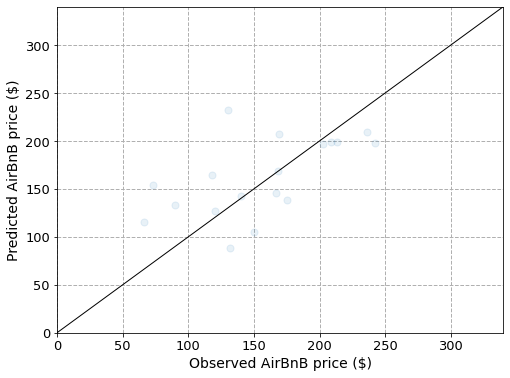

In [36]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_central_test, predictions_central, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [35]:
# Rooms per house
gdf_utm_c['rooms_per_bedroom'] = gdf_utm_c['beds'] / gdf_utm_c['bedrooms']

In [36]:
gdf_utm_c['accuracy_per_num_reviews'] = gdf_utm_c['review_scores_accuracy'] / gdf_utm_c['number_of_reviews_ltm']

In [37]:
gdf_utm_c['communication_per_num_reviews'] = gdf_utm_c['review_scores_communication'] / gdf_utm_c['number_of_reviews_ltm']

In [38]:
gdf_utm_c['cleanliness_per_num_reviews'] = gdf_utm_c['review_scores_cleanliness'] / gdf_utm_c['number_of_reviews_ltm']

In [39]:
gdf_utm_c['value_per_num_reviews'] = gdf_utm_c['review_scores_value'] / gdf_utm_c['number_of_reviews_ltm']

In [40]:
gdf_utm_c['checkin_per_num_reviews'] = gdf_utm_c['review_scores_checkin'] / gdf_utm_c['number_of_reviews_ltm']

In [41]:
gdf_utm_c['rating_per_num_reviews'] = gdf_utm_c['review_scores_rating'] / gdf_utm_c['number_of_reviews_ltm']

In [43]:
gdf_utm_c['location_per_num_reviews'] = gdf_utm_c['review_scores_location'] / gdf_utm_c['number_of_reviews_ltm']

In [44]:
# Compute correlation matrix
corr_matrix_central = gdf_utm_c.corr()

# Display just house value correlations
corr_matrix_central["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.392771
accommodates                      0.369610
calculated_host_listings_count    0.326944
beds                              0.326214
host_id                           0.247307
latitude                          0.243940
id                                0.227499
review_scores_cleanliness         0.064679
location_per_num_reviews          0.063471
value_per_num_reviews             0.060947
cleanliness_per_num_reviews       0.051938
communication_per_num_reviews     0.051925
rating_per_num_reviews            0.048474
maximum_nights                    0.037571
checkin_per_num_reviews           0.025431
review_scores_location           -0.009437
availability_365                 -0.039039
number_of_reviews_ltm            -0.051617
review_scores_accuracy           -0.075635
review_scores_communication      -0.087145
reviews_per_month                -0.090419
review_scores_value              -0.094305
review_scor

**Check new features**

In [151]:
# Split data 
X_central_train, X_central_test, y_central_train, y_central_test = train_test_split(X_scaled_central, y_central, test_size=0.2, random_state=42)

In [152]:
# Define model
forest_reg_central1 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_central1.fit(X_central_train, y_central_train)

RandomForestRegressor(n_estimators=30)

In [153]:
# Predict test labels predictions
predictions_central1 = forest_reg_central1.predict(X_central_test)

# Compute mean-squared-error
final_mse_central = mean_squared_error(y_central_test , predictions_central1)
final_rmse_central = np.sqrt(final_mse_central)
final_rmse_central

# output number is the number of errors
# the lower the number the better the model

34.44836268036588

(0.0, 340.0)

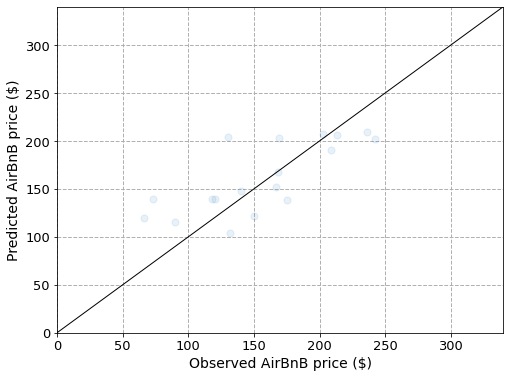

In [154]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_central_test, predictions_central1, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

**end of Central district**

# East District

**Bring in csv of District for regressor**

In [45]:
# Import data
df_east = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_east.csv')

In [46]:
# Convert DataFrame to GeoDataFrame
gdf_east = gpd.GeoDataFrame(df_east, geometry=gpd.points_from_xy(df_east['longitude'], df_east['latitude']))
gdf_east = gdf_east.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_e = gdf_east.to_crs('EPSG:32610')

In [47]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [48]:
# Define features and labels 
X_east = gdf_utm_e[feature_list]
y_east = gdf_utm_e['price']

# Standarize data
scaler_east = StandardScaler()  
X_scaled_east = scaler_east.fit_transform(X_east)

In [49]:
# Split data 
X_east_train, X_east_test, y_east_train, y_east_test = train_test_split(X_scaled_east, y_east, test_size=0.2, random_state=42)

In [50]:
# Define model
forest_reg_east = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_east.fit(X_east_train, y_east_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [51]:
# Predict test labels predictions
predictions_east = forest_reg_east.predict(X_east_test)

# Compute mean-squared-error
final_mse_east = mean_squared_error(y_east_test , predictions_east)
final_rmse_east = np.sqrt(final_mse_east)
final_rmse_east

# output number is the number of errors
# the lower the number the better the model

184.99036515997315

### Plot

(0.0, 340.0)

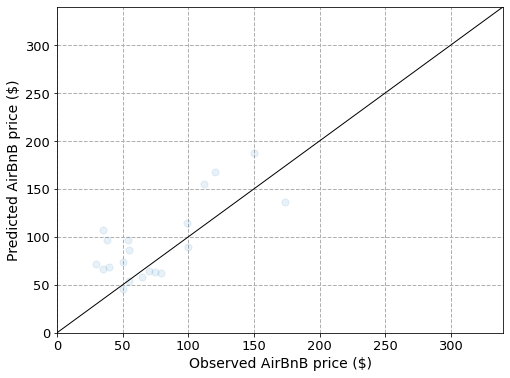

In [45]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_east_test, predictions_east, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [56]:
# Rooms per house
gdf_utm_e['rooms_per_bedroom'] = gdf_utm_e['beds'] / gdf_utm_e['bedrooms']

In [57]:
gdf_utm_e['accuracy_per_num_reviews'] = gdf_utm_e['review_scores_accuracy'] / gdf_utm_e['number_of_reviews_ltm']

In [58]:
gdf_utm_e['communication_per_num_reviews'] = gdf_utm_e['review_scores_communication'] / gdf_utm_e['number_of_reviews_ltm']

In [55]:
gdf_utm_e['cleanliness_per_num_reviews'] = gdf_utm_e['review_scores_cleanliness'] / gdf_utm_e['number_of_reviews_ltm']

In [60]:
gdf_utm_e['value_per_num_reviews'] = gdf_utm_e['review_scores_value'] / gdf_utm_e['number_of_reviews_ltm']

In [61]:
gdf_utm_e['checkin_per_num_reviews'] = gdf_utm_e['review_scores_checkin'] / gdf_utm_e['number_of_reviews_ltm']

In [62]:
gdf_utm_e['rating_per_num_reviews'] = gdf_utm_e['review_scores_rating'] / gdf_utm_e['number_of_reviews_ltm']

In [63]:
gdf_utm_e['location_per_num_reviews'] = gdf_utm_e['review_scores_location'] / gdf_utm_e['number_of_reviews_ltm']

In [64]:
# Compute correlation matrix
corr_matrix_east = gdf_utm_e.corr()

# Display just house value correlations
corr_matrix_east["price"].sort_values(ascending= False)

price                             1.000000
beds                              0.703230
bedrooms                          0.687006
accommodates                      0.618873
rooms_per_bedroom                 0.177237
availability_365                  0.086867
latitude                          0.083872
host_id                           0.070026
review_scores_communication       0.066604
review_scores_checkin             0.060828
review_scores_rating              0.032571
review_scores_cleanliness         0.020313
review_scores_accuracy            0.015816
calculated_host_listings_count   -0.000494
review_scores_location           -0.021235
longitude                        -0.040823
id                               -0.041882
review_scores_value              -0.045506
communication_per_num_reviews    -0.093178
rating_per_num_reviews           -0.093820
checkin_per_num_reviews          -0.094131
accuracy_per_num_reviews         -0.095442
value_per_num_reviews            -0.098990
location_pe

**Check new features**

In [155]:
# Split data 
X_east_train, X_east_test, y_east_train, y_east_test = train_test_split(X_scaled_east, y_east, test_size=0.2, random_state=42)

In [156]:
# Define model
forest_reg_east2 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_east2.fit(X_east_train, y_east_train)

RandomForestRegressor(n_estimators=30)

In [157]:
# Predict test labels predictions
predictions_east2 = forest_reg_east2.predict(X_east_test)

# Compute mean-squared-error
final_mse_east = mean_squared_error(y_east_test , predictions_east2)
final_rmse_east = np.sqrt(final_mse_east)
final_rmse_east

# output number is the number of errors
# the lower the number the better the model

201.70158513121422

(0.0, 340.0)

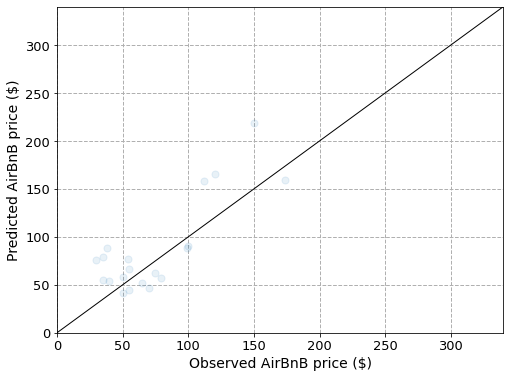

In [158]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_east_test, predictions_east2, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

**end of East district**

# North District

**Bring in csv of District for regressor**

In [65]:
# Import data
df_north = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_north.csv')

In [66]:
# Convert DataFrame to GeoDataFrame
gdf_north = gpd.GeoDataFrame(df_north, geometry=gpd.points_from_xy(df_north['longitude'], df_north['latitude']))
gdf_north = gdf_north.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_n = gdf_north.to_crs('EPSG:32610')

In [67]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [68]:
# Define features and labels 
X_north = gdf_utm_n[feature_list]
y_north = gdf_utm_n['price']

# Standarize data
scaler_north = StandardScaler()  
X_scaled_north = scaler_north.fit_transform(X_north)

In [69]:
# Split data 
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_scaled_north, y_north, test_size=0.2, random_state=42)

In [70]:
# Define model
forest_reg_north = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_north.fit(X_north_train, y_north_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [71]:
# Predict test labels predictions
predictions_north = forest_reg_north.predict(X_north_test)

# Compute mean-squared-error
final_mse_north = mean_squared_error(y_north_test , predictions_north)
final_rmse_north = np.sqrt(final_mse_north)
final_rmse_north

# output number is the number of errors
# the lower the number the better the model

70.4230681329103

### Plot

(0.0, 340.0)

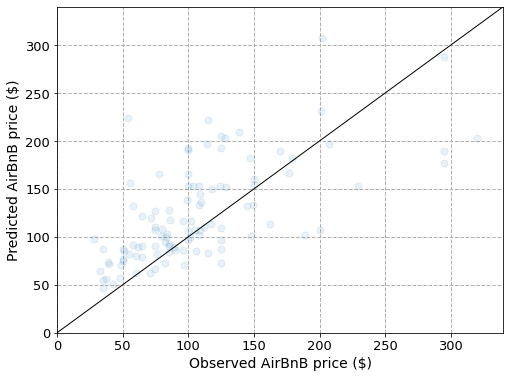

In [72]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_north_test, predictions_north, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [73]:
# Rooms per house
gdf_utm_n['rooms_per_bedroom'] = gdf_utm_n['beds'] / gdf_utm_n['bedrooms']

In [74]:
gdf_utm_n['accuracy_per_num_reviews'] = gdf_utm_n['review_scores_accuracy'] / gdf_utm_n['number_of_reviews_ltm']

In [75]:
gdf_utm_n['communication_per_num_reviews'] = gdf_utm_n['review_scores_communication'] / gdf_utm_n['number_of_reviews_ltm']

In [76]:
gdf_utm_n['cleanliness_per_num_reviews'] = gdf_utm_n['review_scores_cleanliness'] / gdf_utm_n['number_of_reviews_ltm']

In [77]:
gdf_utm_n['value_per_num_reviews'] = gdf_utm_n['review_scores_value'] / gdf_utm_n['number_of_reviews_ltm']

In [78]:
gdf_utm_n['checkin_per_num_reviews'] = gdf_utm_n['review_scores_checkin'] / gdf_utm_n['number_of_reviews_ltm']

In [79]:
gdf_utm_n['rating_per_num_reviews'] = gdf_utm_n['review_scores_rating'] / gdf_utm_n['number_of_reviews_ltm']

In [80]:
gdf_utm_n['location_per_num_reviews'] = gdf_utm_n['review_scores_location'] / gdf_utm_n['number_of_reviews_ltm']

In [81]:
# Compute correlation matrix
corr_matrix_north = gdf_utm_n.corr()

# Display just house value correlations
corr_matrix_north["price"].sort_values(ascending= False)

price                             1.000000
accommodates                      0.456018
bedrooms                          0.444313
beds                              0.413276
longitude                         0.085706
maximum_nights                    0.059900
review_scores_location            0.040232
id                                0.038487
location_per_num_reviews          0.025779
checkin_per_num_reviews           0.021745
rating_per_num_reviews            0.020423
accuracy_per_num_reviews          0.020207
communication_per_num_reviews     0.019100
value_per_num_reviews             0.019071
cleanliness_per_num_reviews       0.018453
host_id                           0.017035
rooms_per_bedroom                 0.001633
review_scores_checkin             0.000968
review_scores_rating             -0.000550
availability_365                 -0.005553
review_scores_communication      -0.011138
review_scores_accuracy           -0.011164
review_scores_cleanliness        -0.014719
calculated_

**Check new features**

In [159]:
# Split data 
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_scaled_north, y_north, test_size=0.2, random_state=42)

In [160]:
# Define model
forest_reg_north2 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_north2.fit(X_north_train, y_north_train)

RandomForestRegressor(n_estimators=30)

In [161]:
# Predict test labels predictions
predictions_north2 = forest_reg_north2.predict(X_north_test)

# Compute mean-squared-error
final_mse_north = mean_squared_error(y_north_test , predictions_north2)
final_rmse_north = np.sqrt(final_mse_north)
final_rmse_north

# output number is the number of errors
# the lower the number the better the model

74.86160767062314

(0.0, 340.0)

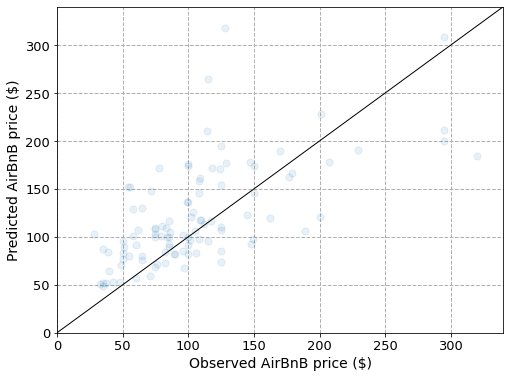

In [162]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_north_test, predictions_north2, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

**end of North district**

# Northeast District

In [82]:
# Import data
df_northeast = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_northeast.csv')

In [83]:
# Convert DataFrame to GeoDataFrame
gdf_northeast = gpd.GeoDataFrame(df_northeast, geometry=gpd.points_from_xy(df_northeast['longitude'], df_northeast['latitude']))
gdf_northeast = gdf_northeast.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_ne = gdf_northeast.to_crs('EPSG:32610')

In [85]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [86]:
# Define features and labels 
X_northeast = gdf_utm_ne[feature_list]
y_northeast = gdf_utm_ne['price']

# Standarize data
scaler_northeast = StandardScaler()  
X_scaled_northeast = scaler_northeast.fit_transform(X_northeast)

In [87]:
# Split data 
X_northeast_train, X_northeast_test, y_northeast_train, y_northeast_test = train_test_split(X_scaled_northeast, y_northeast, test_size=0.2, random_state=42)

In [88]:
# Define model
forest_reg_northeast = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_northeast.fit(X_northeast_train, y_northeast_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [89]:
# Predict test labels predictions
predictions_northeast = forest_reg_northeast.predict(X_northeast_test)

# Compute mean-squared-error
final_mse_northeast = mean_squared_error(y_northeast_test , predictions_northeast)
final_rmse_northeast = np.sqrt(final_mse_northeast)
final_rmse_northeast

# output number is the number of errors
# the lower the number the better the model

64.61750135591349

### Plot

(0.0, 340.0)

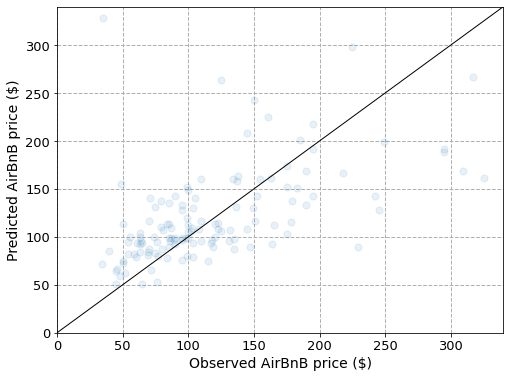

In [90]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_northeast_test, predictions_northeast, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [91]:
# Rooms per house
gdf_utm_ne['rooms_per_bedroom'] = gdf_utm_ne['beds'] / gdf_utm_ne['bedrooms']

In [92]:
gdf_utm_ne['accuracy_per_num_reviews'] = gdf_utm_ne['review_scores_accuracy'] / gdf_utm_ne['number_of_reviews_ltm']

In [93]:
gdf_utm_ne['communication_per_num_reviews'] = gdf_utm_ne['review_scores_communication'] / gdf_utm_ne['number_of_reviews_ltm']

In [94]:
gdf_utm_ne['cleanliness_per_num_reviews'] = gdf_utm_ne['review_scores_cleanliness'] / gdf_utm_ne['number_of_reviews_ltm']

In [95]:
gdf_utm_ne['value_per_num_reviews'] = gdf_utm_ne['review_scores_value'] / gdf_utm_ne['number_of_reviews_ltm']

In [96]:
gdf_utm_ne['checkin_per_num_reviews'] = gdf_utm_ne['review_scores_checkin'] / gdf_utm_ne['number_of_reviews_ltm']

In [97]:
gdf_utm_ne['rating_per_num_reviews'] = gdf_utm_ne['review_scores_rating'] / gdf_utm_ne['number_of_reviews_ltm']

In [98]:
gdf_utm_ne['location_per_num_reviews'] = gdf_utm_ne['review_scores_location'] / gdf_utm_ne['number_of_reviews_ltm']

In [99]:
# Compute correlation matrix
corr_matrix_northeast = gdf_utm_ne.corr()

# Display just house value correlations
corr_matrix_northeast["price"].sort_values(ascending= False)

price                             1.000000
accommodates                      0.639985
bedrooms                          0.632535
beds                              0.620542
maximum_nights                    0.085718
calculated_host_listings_count    0.068195
availability_365                  0.056160
review_scores_rating              0.043994
review_scores_location            0.040900
review_scores_accuracy            0.025677
host_id                           0.016888
review_scores_cleanliness         0.015079
id                                0.013159
latitude                          0.011727
review_scores_communication       0.004880
minimum_nights                    0.001505
rooms_per_bedroom                -0.000057
rating_per_num_reviews           -0.000991
accuracy_per_num_reviews         -0.001621
cleanliness_per_num_reviews      -0.002029
location_per_num_reviews         -0.002298
communication_per_num_reviews    -0.003632
checkin_per_num_reviews          -0.006149
value_per_n

**Check new features**

In [163]:
# Split data 
X_northeast_train, X_northeast_test, y_northeast_train, y_northeast_test = train_test_split(X_scaled_northeast, y_northeast, test_size=0.2, random_state=42)

In [164]:
# Define model
forest_reg_northeast2 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_northeast2.fit(X_northeast_train, y_northeast_train)

RandomForestRegressor(n_estimators=30)

In [165]:
# Predict test labels predictions
predictions_northeast2 = forest_reg_northeast2.predict(X_northeast_test)

# Compute mean-squared-error
final_mse_northeast = mean_squared_error(y_northeast_test , predictions_northeast2)
final_rmse_northeast = np.sqrt(final_mse_northeast)
final_rmse_northeast

# output number is the number of errors
# the lower the number the better the model

66.8490588315697

(0.0, 340.0)

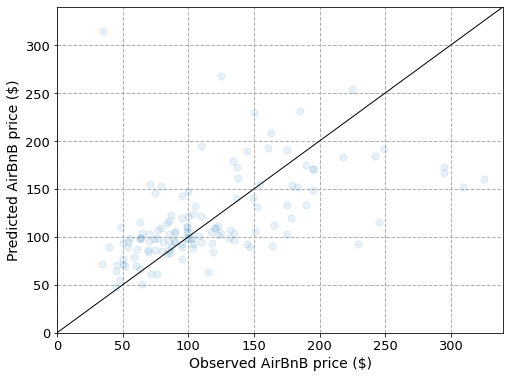

In [166]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_northeast_test, predictions_northeast2, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

**end of Central district**

# Northwest District

**Bring in csv of District for regressor**

In [100]:
# Import data
df_northwest = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_northwest.csv')

In [101]:
# Convert DataFrame to GeoDataFrame
gdf_northwest = gpd.GeoDataFrame(df_northwest, geometry=gpd.points_from_xy(df_northwest['longitude'], df_northwest['latitude']))
gdf_northwest = gdf_northwest.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_nw = gdf_northwest.to_crs('EPSG:32610')

In [102]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [103]:
# Define features and labels 
X_northwest = gdf_utm_n[feature_list]
y_northwest = gdf_utm_n['price']

# Standarize data
scaler_northwest = StandardScaler()  
X_scaled_northwest = scaler_northwest.fit_transform(X_northwest)

In [104]:
# Split data 
X_northwest_train, X_northwest_test, y_northwest_train, y_northwest_test = train_test_split(X_scaled_northwest, y_northwest, test_size=0.2, random_state=42)

In [105]:
# Define model
forest_reg_northwest = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_northwest.fit(X_northwest_train, y_northwest_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [106]:
# Predict test labels predictions
predictions_northwest = forest_reg_northwest.predict(X_northwest_test)

# Compute mean-squared-error
final_mse_northwest = mean_squared_error(y_northwest_test , predictions_northwest)
final_rmse_northwest = np.sqrt(final_mse_northwest)
final_rmse_northwest

# output number is the number of errors
# the lower the number the better the model

70.3254717708881

### Plot

(0.0, 340.0)

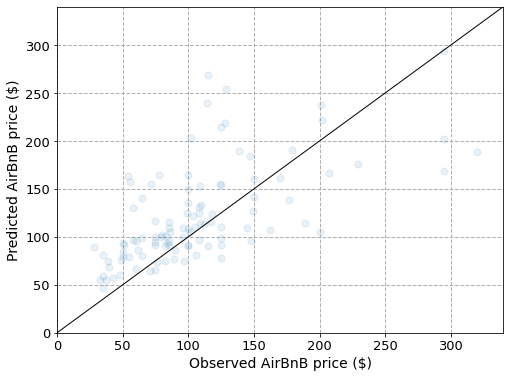

In [107]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_northwest_test, predictions_northwest, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [108]:
# Rooms per house
gdf_utm_nw['rooms_per_bedroom'] = gdf_utm_nw['beds'] / gdf_utm_nw['bedrooms']

In [109]:
gdf_utm_nw['accuracy_per_num_reviews'] = gdf_utm_nw['review_scores_accuracy'] / gdf_utm_nw['number_of_reviews_ltm']

In [110]:
gdf_utm_nw['communication_per_num_reviews'] = gdf_utm_nw['review_scores_communication'] / gdf_utm_nw['number_of_reviews_ltm']

In [111]:
gdf_utm_nw['cleanliness_per_num_reviews'] = gdf_utm_nw['review_scores_cleanliness'] / gdf_utm_nw['number_of_reviews_ltm']

In [112]:
gdf_utm_nw['value_per_num_reviews'] = gdf_utm_nw['review_scores_value'] / gdf_utm_nw['number_of_reviews_ltm']

In [113]:
gdf_utm_nw['checkin_per_num_reviews'] = gdf_utm_nw['review_scores_checkin'] / gdf_utm_nw['number_of_reviews_ltm']

In [114]:
gdf_utm_nw['rating_per_num_reviews'] = gdf_utm_nw['review_scores_rating'] / gdf_utm_nw['number_of_reviews_ltm']

In [115]:
gdf_utm_nw['location_per_num_reviews'] = gdf_utm_nw['review_scores_location'] / gdf_utm_nw['number_of_reviews_ltm']

In [116]:
# Compute correlation matrix
corr_matrix_northwest = gdf_utm_n.corr()

# Display just house value correlations
corr_matrix_northwest["price"].sort_values(ascending= False)

price                             1.000000
accommodates                      0.456018
bedrooms                          0.444313
beds                              0.413276
longitude                         0.085706
maximum_nights                    0.059900
review_scores_location            0.040232
id                                0.038487
location_per_num_reviews          0.025779
checkin_per_num_reviews           0.021745
rating_per_num_reviews            0.020423
accuracy_per_num_reviews          0.020207
communication_per_num_reviews     0.019100
value_per_num_reviews             0.019071
cleanliness_per_num_reviews       0.018453
host_id                           0.017035
rooms_per_bedroom                 0.001633
review_scores_checkin             0.000968
review_scores_rating             -0.000550
availability_365                 -0.005553
review_scores_communication      -0.011138
review_scores_accuracy           -0.011164
review_scores_cleanliness        -0.014719
calculated_

**Check new features**

In [167]:
# Split data 
X_northwest_train, X_northwest_test, y_northwest_train, y_northwest_test = train_test_split(X_scaled_northwest, y_northwest, test_size=0.2, random_state=42)

In [168]:
# Define model
forest_reg_northwest2 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_northwest2.fit(X_northwest_train, y_northwest_train)

RandomForestRegressor(n_estimators=30)

In [169]:
# Predict test labels predictions
predictions_northwest2 = forest_reg_northwest2.predict(X_northwest_test)

# Compute mean-squared-error
final_mse_northwest = mean_squared_error(y_northwest_test , predictions_northwest2)
final_rmse_northwest = np.sqrt(final_mse_northwest)
final_rmse_northwest

# output number is the number of errors
# the lower the number the better the model

72.4440930384363

(0.0, 340.0)

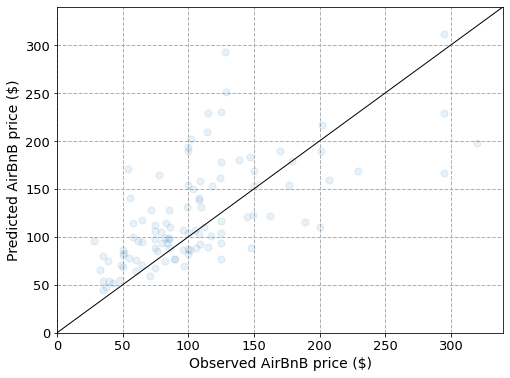

In [170]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_northwest_test, predictions_northwest2, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

**end of Northwest district**

# Southeast District

**Bring in csv of District for regressor**

In [117]:
# Import data
df_southeast = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_southeast.csv')

In [118]:
# Convert DataFrame to GeoDataFrame
gdf_southeast = gpd.GeoDataFrame(df_southeast, geometry=gpd.points_from_xy(df_southeast['longitude'], df_southeast['latitude']))
gdf_southeast = gdf_southeast.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_se = gdf_southeast.to_crs('EPSG:32610')

In [119]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [120]:
# Define features and labels 
X_southeast = gdf_utm_se[feature_list]
y_southeast = gdf_utm_se['price']

# Standarize data
scaler_southeast = StandardScaler()  
X_scaled_southeast = scaler_southeast.fit_transform(X_southeast)

In [121]:
# Split data 
X_southeast_train, X_southeast_test, y_southeast_train, y_southeast_test = train_test_split(X_scaled_southeast, y_southeast, test_size=0.2, random_state=42)

In [122]:
# Define model
forest_reg_southeast = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_southeast.fit(X_north_train, y_north_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [123]:
# Predict test labels predictions
predictions_southeast = forest_reg_southeast.predict(X_southeast_test)

# Compute mean-squared-error
final_mse_southeast = mean_squared_error(y_southeast_test , predictions_southeast)
final_rmse_southeast = np.sqrt(final_mse_southeast)
final_rmse_southeast

# output number is the number of errors
# the lower the number the better the model

89.03536706606307

### Plot

(0.0, 340.0)

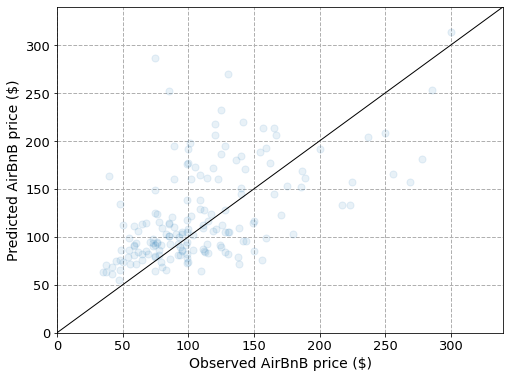

In [124]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_southeast_test, predictions_southeast, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [125]:
# Rooms per house
gdf_utm_se['rooms_per_bedroom'] = gdf_utm_se['beds'] / gdf_utm_se['bedrooms']

In [126]:
gdf_utm_se['accuracy_per_num_reviews'] = gdf_utm_se['review_scores_accuracy'] / gdf_utm_se['number_of_reviews_ltm']

In [127]:
gdf_utm_se['communication_per_num_reviews'] = gdf_utm_se['review_scores_communication'] / gdf_utm_se['number_of_reviews_ltm']

In [128]:
gdf_utm_se['cleanliness_per_num_reviews'] = gdf_utm_se['review_scores_cleanliness'] / gdf_utm_se['number_of_reviews_ltm']

In [129]:
gdf_utm_se['value_per_num_reviews'] = gdf_utm_se['review_scores_value'] / gdf_utm_se['number_of_reviews_ltm']

In [130]:
gdf_utm_se['checkin_per_num_reviews'] = gdf_utm_se['review_scores_checkin'] / gdf_utm_se['number_of_reviews_ltm']

In [131]:
gdf_utm_se['rating_per_num_reviews'] = gdf_utm_se['review_scores_rating'] / gdf_utm_se['number_of_reviews_ltm']

In [132]:
gdf_utm_se['location_per_num_reviews'] = gdf_utm_se['review_scores_location'] / gdf_utm_se['number_of_reviews_ltm']

In [133]:
# Compute correlation matrix
corr_matrix_southeast = gdf_utm_se.corr()

# Display just house value correlations
corr_matrix_southeast["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.608194
accommodates                      0.559900
beds                              0.483508
maximum_nights                    0.105472
review_scores_cleanliness         0.064393
review_scores_rating              0.062924
id                                0.057626
review_scores_accuracy            0.042467
review_scores_communication       0.026698
rooms_per_bedroom                 0.026195
latitude                          0.025471
cleanliness_per_num_reviews       0.012654
rating_per_num_reviews            0.010684
value_per_num_reviews             0.010542
accuracy_per_num_reviews          0.009826
communication_per_num_reviews     0.006545
checkin_per_num_reviews           0.006531
location_per_num_reviews          0.005206
host_id                          -0.007314
review_scores_location           -0.007997
review_scores_value              -0.019364
review_scores_checkin            -0.020017
longitude  

**Check new features**

In [171]:
# Split data 
X_southeast_train, X_southeast_test, y_southeast_train, y_southeast_test = train_test_split(X_scaled_southeast, y_southeast, test_size=0.2, random_state=42)

In [172]:
# Define model
forest_reg_southeast2 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_southeast2.fit(X_north_train, y_north_train)

RandomForestRegressor(n_estimators=30)

In [173]:
# Predict test labels predictions
predictions_southeast2 = forest_reg_southeast2.predict(X_southeast_test)

# Compute mean-squared-error
final_mse_southeast = mean_squared_error(y_southeast_test , predictions_southeast2)
final_rmse_southeast = np.sqrt(final_mse_southeast)
final_rmse_southeast

# output number is the number of errors
# the lower the number the better the model

104.26291397822733

(0.0, 340.0)

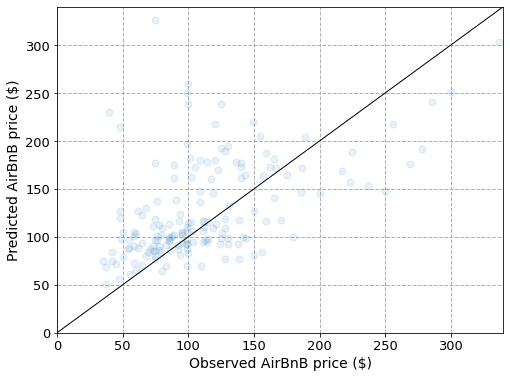

In [174]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_southeast_test, predictions_southeast2, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

**end of Southeast district**

# Southwest District

**Bring in csv of District for regressor**

In [134]:
# Import data
df_southwest = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_southwest.csv')

In [135]:
# Convert DataFrame to GeoDataFrame
gdf_southwest = gpd.GeoDataFrame(df_southwest, geometry=gpd.points_from_xy(df_southwest['longitude'], df_southwest['latitude']))
gdf_southwest = gdf_southwest.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_sw = gdf_southwest.to_crs('EPSG:32610')

In [136]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [137]:
# Define features and labels 
X_southwest = gdf_utm_sw[feature_list]
y_southwest = gdf_utm_sw['price']

# Standarize data
scaler_southwest = StandardScaler()  
X_scaled_southwest = scaler_southwest.fit_transform(X_southwest)

In [138]:
# Split data 
X_nosouthwest_train, X_southwest_test, y_southwest_train, y_southwest_test = train_test_split(X_scaled_southwest, y_southwest, test_size=0.2, random_state=42)

In [139]:
# Define model
forest_reg_southwest = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_southwest.fit(X_north_train, y_north_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [140]:
# Predict test labels predictions
predictions_southwest = forest_reg_southwest.predict(X_southwest_test)

# Compute mean-squared-error
final_mse_southwest = mean_squared_error(y_southwest_test , predictions_southwest)
final_rmse_southwest = np.sqrt(final_mse_southwest)
final_rmse_southwest

# output number is the number of errors
# the lower the number the better the model

71.43845767717916

### Plot

(0.0, 340.0)

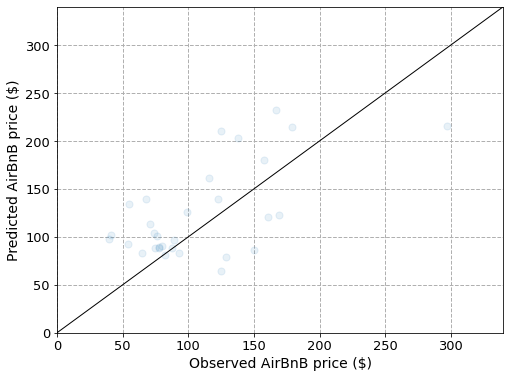

In [141]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_southwest_test, predictions_southwest, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [142]:
# Rooms per house
gdf_utm_sw['rooms_per_bedroom'] = gdf_utm_sw['beds'] / gdf_utm_sw['bedrooms']

In [143]:
gdf_utm_sw['accuracy_per_num_reviews'] = gdf_utm_sw['review_scores_accuracy'] / gdf_utm_sw['number_of_reviews_ltm']

In [144]:
gdf_utm_sw['communication_per_num_reviews'] = gdf_utm_sw['review_scores_communication'] / gdf_utm_sw['number_of_reviews_ltm']

In [145]:
gdf_utm_sw['cleanliness_per_num_reviews'] = gdf_utm_sw['review_scores_cleanliness'] / gdf_utm_sw['number_of_reviews_ltm']

In [146]:
gdf_utm_sw['value_per_num_reviews'] = gdf_utm_sw['review_scores_value'] / gdf_utm_sw['number_of_reviews_ltm']

In [147]:
gdf_utm_sw['checkin_per_num_reviews'] = gdf_utm_sw['review_scores_checkin'] / gdf_utm_sw['number_of_reviews_ltm']

In [148]:
gdf_utm_sw['rating_per_num_reviews'] = gdf_utm_sw['review_scores_rating'] / gdf_utm_sw['number_of_reviews_ltm']

In [149]:
gdf_utm_sw['location_per_num_reviews'] = gdf_utm_sw['review_scores_location'] / gdf_utm_sw['number_of_reviews_ltm']

In [150]:
# Compute correlation matrix
corr_matrix_southwest = gdf_utm_sw.corr()

# Display just house value correlations
corr_matrix_southwest["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.845089
accommodates                      0.824692
beds                              0.802497
cleanliness_per_num_reviews       0.187846
location_per_num_reviews          0.180167
accuracy_per_num_reviews          0.178492
communication_per_num_reviews     0.178424
rating_per_num_reviews            0.178317
checkin_per_num_reviews           0.176668
value_per_num_reviews             0.175945
review_scores_communication       0.113323
review_scores_rating              0.112728
review_scores_location            0.102262
maximum_nights                    0.095518
latitude                          0.091240
review_scores_accuracy            0.091205
review_scores_checkin             0.078503
review_scores_cleanliness         0.071389
review_scores_value               0.052663
rooms_per_bedroom                 0.041258
host_id                           0.013486
id                                0.001748
availabilit

**Check new features**

In [175]:
# Split data 
X_nosouthwest_train, X_southwest_test, y_southwest_train, y_southwest_test = train_test_split(X_scaled_southwest, y_southwest, test_size=0.2, random_state=42)

In [176]:
# Define model
forest_reg_southwest2 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_southwest2.fit(X_north_train, y_north_train)

RandomForestRegressor(n_estimators=30)

In [177]:
# Predict test labels predictions
predictions_southwest2 = forest_reg_southwest2.predict(X_southwest_test)

# Compute mean-squared-error
final_mse_southwest = mean_squared_error(y_southwest_test , predictions_southwest2)
final_rmse_southwest = np.sqrt(final_mse_southwest)
final_rmse_southwest

# output number is the number of errors
# the lower the number the better the model

53.14528643810507

(0.0, 340.0)

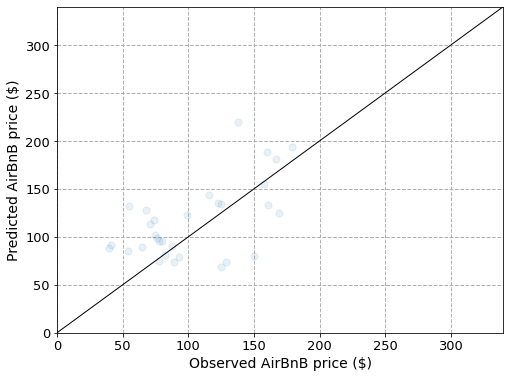

In [178]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_southwest_test, predictions_southwest2, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

**end of Southwest district**